Analysis of Fandango Movie Ratings

In [9]:
import pandas as pd
fandango_score_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')
previous = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
                                 'Fandango_votes', 'Fandango_Difference']]
after = movie_ratings_16_17[['movie', 'year', 'fandango']]
print(previous.head())
print(after.head())

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  
                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0


In [16]:
previous['year'] = previous['FILM'].str[-5:-1]
fandango_2015 = previous[previous['year'] == '2015']
fandango_2016 = after[after['year'] == 2016]
print(fandango_2015.head())
print(fandango_2016.head())

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  year  
0           14846                  0.5  2015  
1           12640                  0.5  2015  
2           12055                  0.5  2015  
3            1793                  0.5  2015  
4            1021                  0.5  2015  
                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
4  A Hologram for the King  2016       3.0
5          A Monster Calls  2016       4.0


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


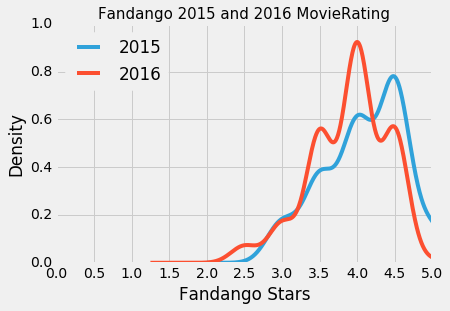

In [27]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title('Fandango 2015 and 2016 MovieRating', size = 15)
plt.xlabel('Fandango Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,0.5))
plt.show()

4.5    49
4.0    37
3.5    23
3.0    11
5.0     9
Name: Fandango_Stars, dtype: int64
4.0    77
4.5    47
3.5    46
3.0    14
2.5     6
5.0     1
Name: fandango, dtype: int64


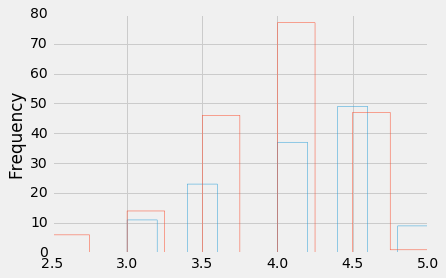

In [37]:
print(fandango_2015['Fandango_Stars'].value_counts())
print(fandango_2016['fandango'].value_counts())
fandango_2015['Fandango_Stars'].plot.hist(histtype = 'step')
fandango_2016['fandango'].plot.hist(histtype = 'step')

In [53]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


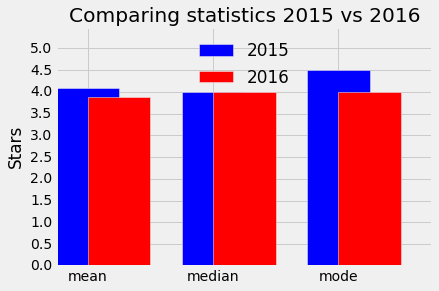

In [62]:
summary['2015'].plot.bar(color = 'blue', align = 'center', label = '2015', legend = True, rot = 0)
summary['2016'].plot.bar(color = 'red', align = 'edge', label = '2016', legend =True, rot = 0)

plt.title('Comparing statistics 2015 vs 2016')
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

Our analysis showed that there's indeed a slight difference between Fandango's 
ratings for popular movies in 2015 and 
Fandango's ratings for popular movies in 2016. 
We also determined that, on average, popular movies released in 2016 were 
rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, 
but the chances are very high that it was caused by Fandango 
fixing the biased rating system after Hickey's analysis.